In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from scipy import ndimage
import matplotlib.pyplot as plt
import scipy
from keras.utils.np_utils import to_categorical
%matplotlib inline
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
import keras.backend as K

Using TensorFlow backend.


In [2]:

train_dataset = h5py.File('datasets/train_signs.h5', "r")
train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

test_dataset = h5py.File('datasets/test_signs.h5', "r")
test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

classes = np.array(test_dataset["list_classes"][:]) # the list of classes


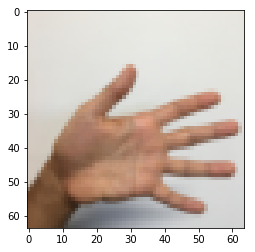

In [3]:
plt.imshow(train_set_x_orig[0])
#plt.show()

In [4]:
train_set_x_orig.shape

(1080, 64, 64, 3)

In [5]:

X_train = train_set_x_orig.astype('float32') / 255.0
X_test = test_set_x_orig.astype('float32') / 255.0



y_train_cat = to_categorical(train_set_y_orig, 6)
y_test_cat = to_categorical(test_set_y_orig, 6)

In [19]:
K.clear_session()

model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(6, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             # optimizer='rmsprop',
              optimizer='adagrad',
              metrics=['accuracy'])

In [20]:

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 7200)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               921728    
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 774       
Total para

In [21]:
model.fit(X_train, y_train_cat, #batch_size=128,
          epochs=20, verbose=1, validation_data=(X_test, y_test_cat))

Train on 1080 samples, validate on 120 samples
Epoch 1/20
1080/1080 [==============================] - 10s 9ms/step - loss: 2.3396 - acc: 0.1713 - val_loss: 1.7743 - val_acc: 0.1667
Epoch 2/20
1080/1080 [==============================] - 9s 9ms/step - loss: 1.6555 - acc: 0.3259 - val_loss: 1.7531 - val_acc: 0.3000
Epoch 3/20
1080/1080 [==============================] - 11s 10ms/step - loss: 1.2243 - acc: 0.5620 - val_loss: 0.8957 - val_acc: 0.7250
Epoch 4/20
1080/1080 [==============================] - 11s 10ms/step - loss: 0.8245 - acc: 0.7259 - val_loss: 0.8497 - val_acc: 0.6583
Epoch 5/20
1080/1080 [==============================] - 10s 9ms/step - loss: 0.5885 - acc: 0.8157 - val_loss: 0.5531 - val_acc: 0.8250
Epoch 6/20
1080/1080 [==============================] - 10s 9ms/step - loss: 0.4319 - acc: 0.8657 - val_loss: 0.5400 - val_acc: 0.7750
Epoch 7/20
1080/1080 [==============================] - 9s 9ms/step - loss: 0.3236 - acc: 0.8972 - val_loss: 0.3916 - val_acc: 0.8833
Epoch 8/

In [33]:
model.predict_classes(X_test[1].reshape(1,64,64,3))

array([0], dtype=int64)

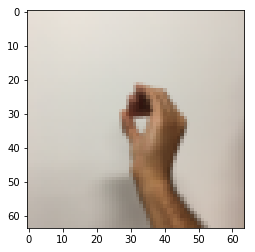

In [34]:
plt.imshow(X_test[1])

In [35]:
model.predict_classes(X_test[2].reshape(1,64,64,3))

array([0], dtype=int64)

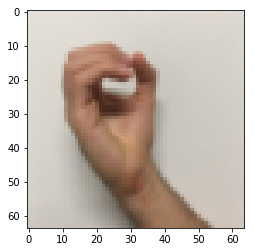

In [36]:
plt.imshow(X_test[2])

In [37]:
model.predict_classes(X_test[30].reshape(1,64,64,3))

array([3], dtype=int64)

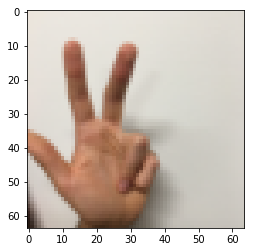

In [39]:
plt.imshow(X_test[30])

In [42]:
model.predict_classes(X_test[3].reshape(1,64,64,3))


array([5], dtype=int64)

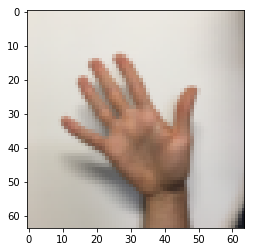

In [41]:
plt.imshow(X_test[3])

In [43]:
# save and load a model
from keras.models import load_model

model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'
del model  # deletes the existing model

# returns a compiled model
# identical to the previous one
model = load_model('my_model.h5')

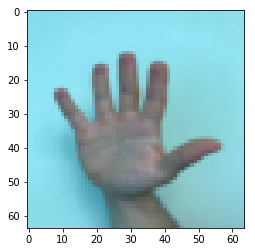

In [72]:
# Test with your image
fname = "myimage6.jpg"
image = np.array(ndimage.imread(fname, flatten=False))
my_image = scipy.misc.imresize(image, size=(64,64))
my_image = my_image/255.0
plt.imshow(my_image)

In [79]:
import re
re.sub(r'\d{1,}', "x",'70 % off')

'x % off'